In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
from scipy.stats import ttest_ind
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model

In [2]:
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [5]:
#Dropping columns 

to_drop = ['EventID',
           'ArrestID',
           'PersonID',
          'ObjectId']  

df.drop(to_drop, inplace=True, axis=1)

In [6]:
#Descriptive statistics overall 

df.groupby(['Perceived_Race', 'Arrest_Year']).describe()

StripSearch                                \
                                       count      mean       std  min  25%   
Perceived_Race       Arrest_Year                                             
Black                2020             8648.0  0.257054  0.437035  0.0  0.0   
                     2021             8878.0  0.023767  0.152330  0.0  0.0   
East/Southeast Asian 2020             2054.0  0.143622  0.350792  0.0  0.0   
                     2021             2361.0  0.019483  0.138245  0.0  0.0   
Indigenous           2020              999.0  0.286286  0.452251  0.0  0.0   
                     2021              935.0  0.021390  0.144759  0.0  0.0   
Latino               2020              808.0  0.155941  0.363024  0.0  0.0   
                     2021              960.0  0.006250  0.078851  0.0  0.0   
Middle-Eastern       2020             1507.0  0.136695  0.343640  0.0  0.0   
                     2021             1730.0  0.012717  0.112082  0.0  0.0   
South Asian          2020             1742.0  0.138347  0.345363  0.0  0.0   
                     2021             1871.0  0.008552  0.092103  0.0  0.0   
Unknown or Legacy    2020             2612.0  0.190276  0.392594  0.0  0.0   
                     2021             2444.0  0.015957  0.125336  0.0  0.0   
White                2020            13607.0  0.238113  0.425944  0.0  0.0   
                     2021            14116.0  0.023094  0.150209  0.0  0.0   

                                                  Booked            ...  \
                                  50%  75%  max    count      mean  ...   
Perceived_Race       Arrest_Year                                    ...   
Black                2020         0.0  1.0  1.0   8648.0  0.564870  ...   
                     2021         0.0  0.0  1.0   8878.0  0.539198  ...   
East/Southeast Asian 2020         0.0  0.0  1.0   2054.0  0.504869  ...   
                     2021         0.0  0.0  1.0   2361.0  0.447692  ...   
Indigenous           2020         0.0  1.0  1.0    999.0  0.583584  ...   
                     2021         0.0  0.0  1.0    935.0  0.525134  ...   
Latino               2020         0.0  0.0  1.0    808.0  0.589109  ...   
                     2021         0.0  0.0  1.0    960.0  0.509375  ...   
Middle-Eastern       2020         0.0  0.0  1.0   1507.0  0.491705  ...   
                     2021         0.0  0.0  1.0   1730.0  0.515029  ...   
South Asian          2020         0.0  0.0  1.0   1742.0  0.517222  ...   
                     2021         0.0  0.0  1.0   1871.0  0.468199  ...   
Unknown or Legacy    2020         0.0  0.0  1.0   2612.0  0.493109  ...   
                     2021         0.0  0.0  1.0   2444.0  0.470131  ...   
White                2020         0.0  0.0  1.0  13607.0  0.528037  ...   
                     2021         0.0  0.0  1.0  14116.0  0.501204  ...   

                                 SearchReason_PossessEvidence      ItemsFound  \
                                                          75%  max      count   
Perceived_Race       Arrest_Year                                                
Black                2020                                 1.0  1.0     2223.0   
                     2021                                 1.0  1.0      211.0   
East/Southeast Asian 2020                                 1.0  1.0      295.0   
                     2021                                 1.0  1.0       46.0   
Indigenous           2020                                 1.0  1.0      286.0   
                     2021                                 1.0  1.0       20.0   
Latino               2020                                 1.0  1.0      126.0   
                     2021                                 1.0  1.0        6.0   
Middle-Eastern       2020                                 1.0  1.0      206.0   
                     2021                                 1.0  1.0       22.0   
South Asian          2020                                 1.0  1.0     

In [7]:
#purpose of this was to fix a problem I ran into during visualizations that included age 
#create list of ordered age group labels

age_labels = ['Aged 17 years and younger', 'Aged 18 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 44 years', 
              'Aged 45 to 54 years', 'Aged 55 to 64 years', 'Aged 65 and older']

#create a age variable that is in order from smallest to largest

df['Age_group__at_arrest_'] = pd.Categorical(df['Age_group__at_arrest_'], categories=age_labels, ordered=True)

# sort the dataframe by ordered age 
df = df.sort_values(by='Age_group__at_arrest_')

In [8]:
#EDA 


#Explore race variable

df['Perceived_Race'].describe()

count     65272
unique        8
top       White
freq      27723
Name: Perceived_Race, dtype: object

In [9]:
#Group by race variable 

df.groupby(['Perceived_Race']).count()

,Arrest_Year,Arrest_Month,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound
Perceived_Race,,,,,,,,,,,,,,,,,,,,
Black,17526,17526,17526,16818,17526,17526,17526,17526,17495,17526,17526,17526,17526,17526,17526,2434,2434,2434,2434,2434
East/Southeast Asian,4415,4415,4415,4261,4415,4415,4415,4415,4405,4415,4415,4415,4415,4415,4415,341,341,341,341,341
Indigenous,1934,1934,1934,1913,1934,1934,1934,1934,1928,1934,1934,1934,1934,1934,1934,306,306,306,306,306
Latino,1768,1768,1768,1726,1768,1768,1768,1768,1759,1768,1768,1768,1768,1768,1768,132,132,132,132,132
Middle-Eastern,3237,3237,3237,3113,3237,3237,3237,3237,3227,3237,3237,3237,3237,3237,3237,228,228,228,228,228
South Asian,3613,3613,3613,3520,3613,3613,3613,3613,3603,3613,3613,3613,3613,3613,3613,257,257,257,257,257
Unknown or Legacy,5056,5056,5056,4881,5056,5056,5056,5056,5045,5056,5056,5056,5056,5056,5056,536,536,536,536,536
White,27723,27723,27723,26957,27723,27723,27723,27723,27645,27723,27723,27723,27723,27723,27723,3566,3566,3566,3566,3566


In [10]:
#Frequency for Race variable 

freq_table = df['Perceived_Race'].value_counts()
print(freq_table)

White                   27723
Black                   17526
Unknown or Legacy        5056
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1768
Name: Perceived_Race, dtype: int64


Text(0.5, 1.0, 'Total Number of Arrests by Race')

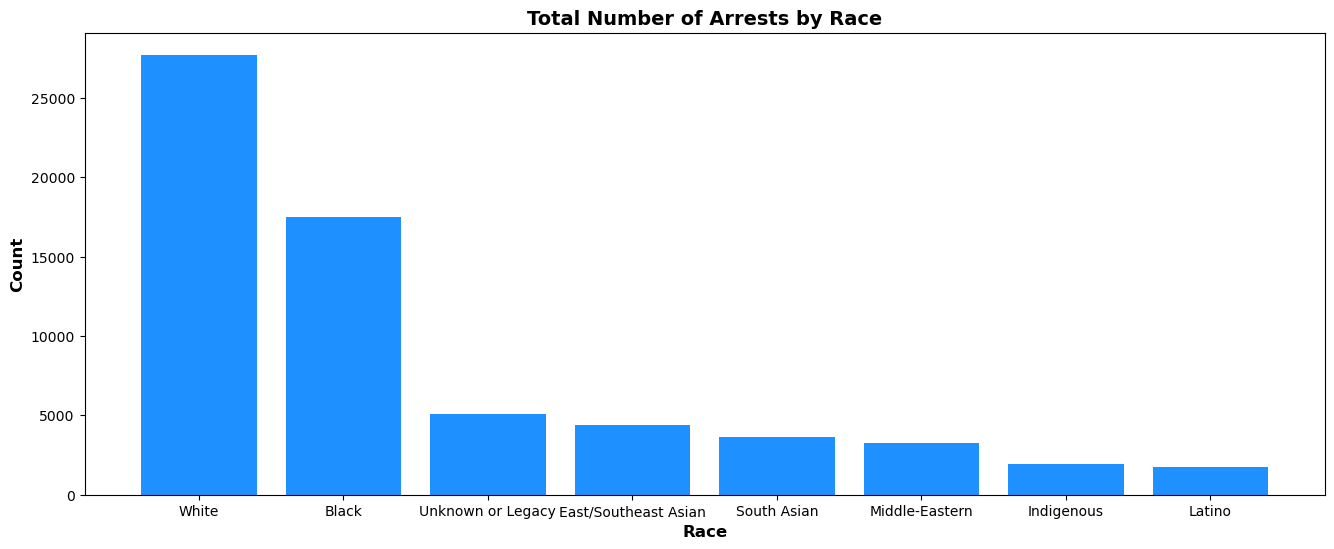

In [11]:

#Perceived race distribution
grouped_data=df["Perceived_Race"].value_counts()
my_figure=plt.figure(figsize=(16,6))
my_figure=my_figure.add_subplot()
my_figure.bar(x=grouped_data.index,height=grouped_data.values, color="#1E90FF")
my_figure.set_xlabel("Race",fontweight="bold",size=12)
my_figure.set_ylabel("Count",fontweight="bold",size=12)
my_figure.set_title("Total Number of Arrests by Race",fontweight="bold",size=14)


In [12]:
#Create a structured frequency table for race variable 

race_freq_table = df['Perceived_Race'].value_counts()
race_count = race_freq_table.values
race_proportion = race_freq_table.values / len(df)
race_percent = race_proportion * 100
race_table = pd.DataFrame({
    'Count': race_count,
    'Proportion': race_proportion,
    'Percent': race_percent
}, index=race_freq_table.index)

# Reset index so that it is not race
race_table = race_table.reset_index()  

race_table = race_table.rename(columns={'index': 'Race'})  

#View
print("Race table:")
race_table


Race table:


,Race,Count,Proportion,Percent
0,White,27723,0.424704,42.470433
1,Black,17526,0.268491,26.849072
2,Unknown or Legacy,5056,0.077456,7.745573
3,East/Southeast Asian,4415,0.067636,6.763588
4,South Asian,3613,0.055350,5.534959
5,Middle-Eastern,3237,0.049589,4.958944
6,Indigenous,1934,0.029628,2.962804
7,Latino,1768,0.027085,2.708499


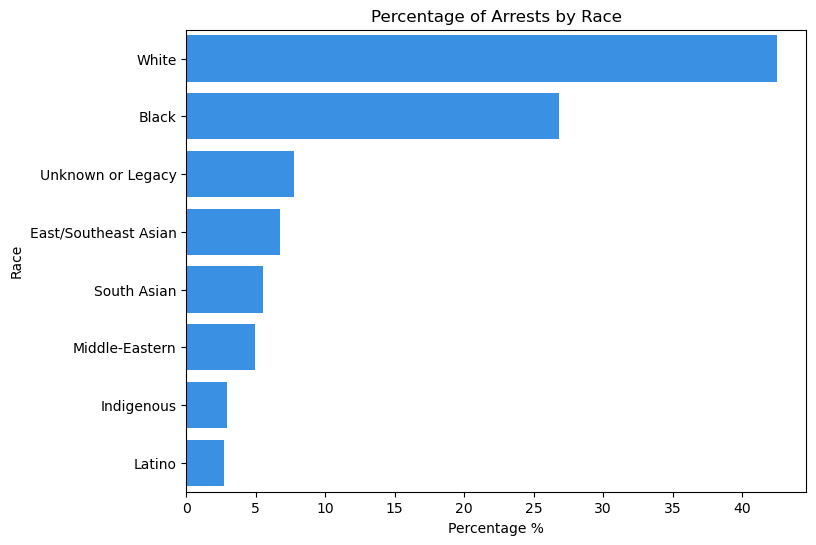

In [13]:
#Create a bar chart that shows the percentage of arrests by race

plt.figure(figsize=(8,6))
ax = sns.barplot(x="Percent", y="Race", data=race_table, color="#1E90FF")

ax.set_title("Percentage of Arrests by Race")
ax.set_xlabel("Percentage %")
ax.set_ylabel("Race")

plt.show()

In [14]:
#This is the start of Research Question 2 (RQ1 is below)


#Descriptive stats for age variable 

df['Age_group__at_arrest_'].describe()

count                   63193
unique                      7
top       Aged 25 to 34 years
freq                    20949
Name: Age_group__at_arrest_, dtype: object

In [15]:
#More details for frequency of age group at arrest 

freq_table = df['Age_group__at_arrest_'].value_counts()
print(freq_table)

Aged 25 to 34 years          20949
Aged 35 to 44 years          16242
Aged 18 to 24 years          10041
Aged 45 to 54 years           9066
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64


In [16]:
# freq table: frequency for age group at arrest   

age_freq_table = df['Age_group__at_arrest_'].value_counts()
age_count = age_freq_table.values
age_proportion = age_freq_table.values / len(df)
age_percent = age_proportion * 100
age_table = pd.DataFrame({
    'Count': age_count,
    'Proportion': age_proportion,
    'Percent': age_percent
}, index=age_freq_table.index)

age_table = age_table.reset_index()  # Reset the index to a regular column
age_table = age_table.rename(columns={'index': 'Age at Arrest'})  # Rename the column to 'Age at Arrest'

print("Age at Arrest table:")
age_table

Age at Arrest table:


,Age at Arrest,Count,Proportion,Percent
0,Aged 25 to 34 years,20949,0.320930,32.092959
1,Aged 35 to 44 years,16242,0.248820,24.882039
2,Aged 18 to 24 years,10041,0.153824,15.382376
3,Aged 45 to 54 years,9066,0.138887,13.888719
4,Aged 55 to 64 years,4590,0.070317,7.031681
5,Aged 17 years and younger,1681,0.025752,2.575219
6,Aged 65 and older,624,0.009559,0.955941


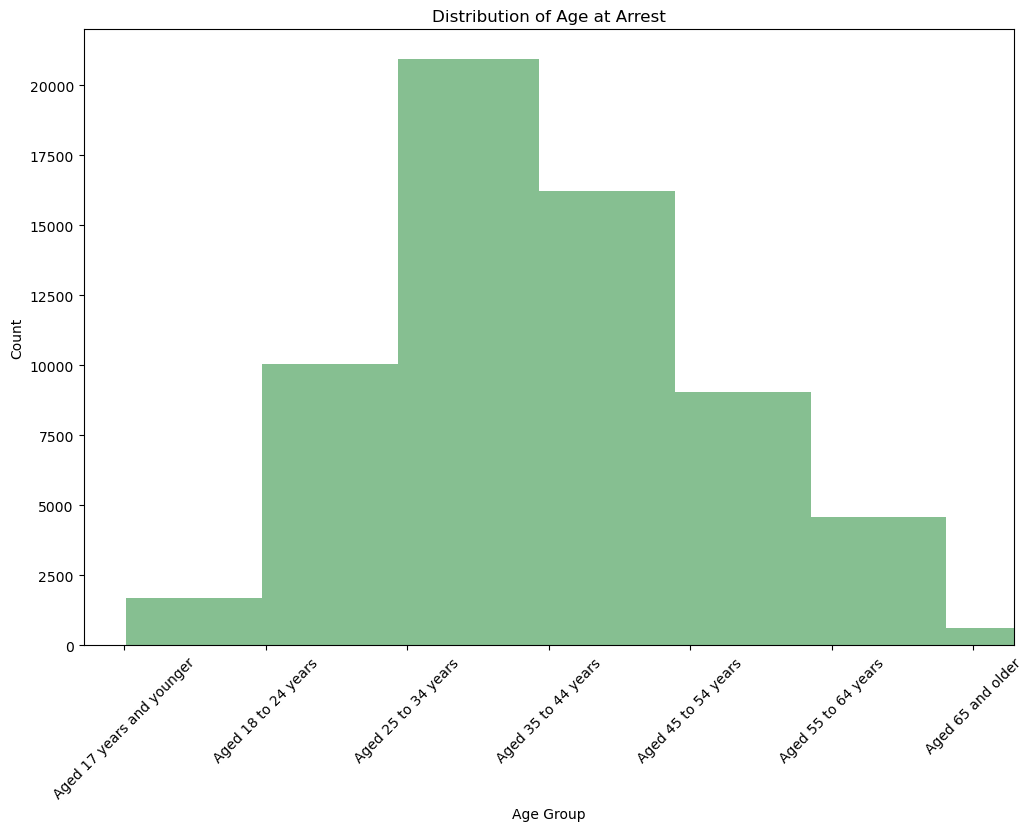

In [17]:
#Histogram 

fig, ax = plt.subplots(figsize=(10, 6))

ax = df['Age_group__at_arrest_'].hist(bins=25, width=1, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)







# Set x-axis ticks and labels
ax.set_xticks(range(len(age_table.index)))
custom_labels = ['Aged 17 years and younger', 'Aged 18 to 24 years', 'Aged 25 to 34 years', 'Aged 35 to 44 years', 'Aged 45 to 54 years', 'Aged 55 to 64 years', 'Aged 65 and older']
ax.set_xticklabels(custom_labels, rotation=45)

# Set axis labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age at Arrest')

# Show plot
plt.show()

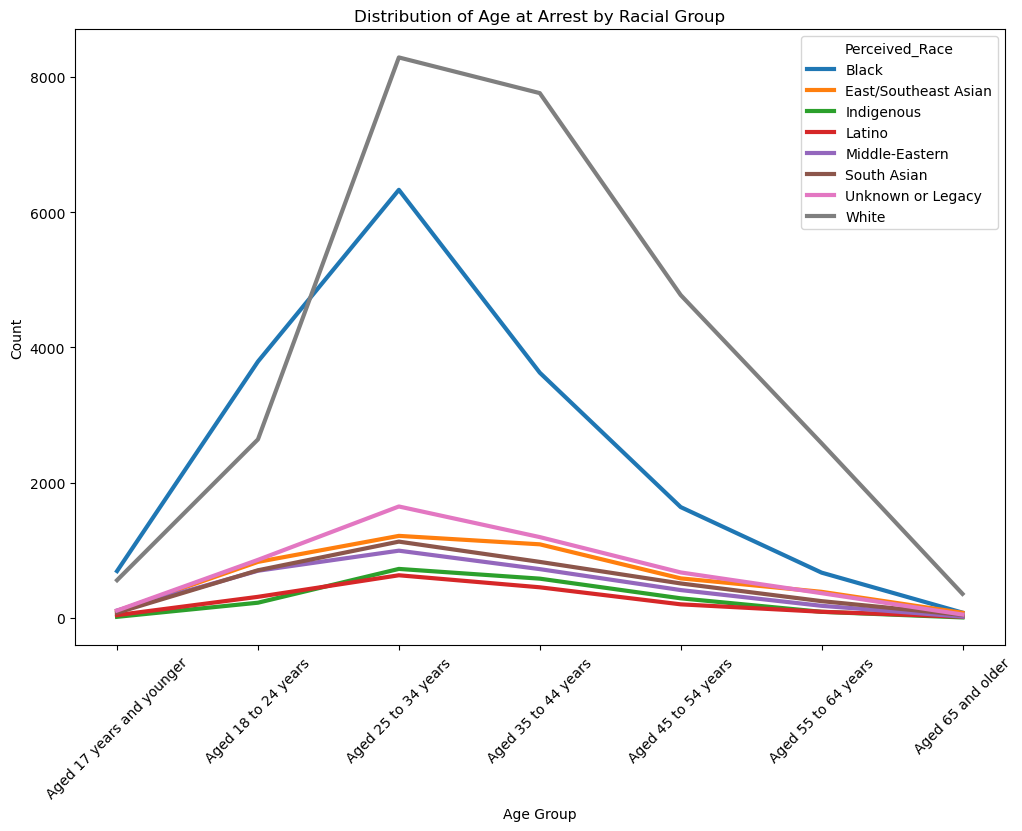

In [18]:
#Making line graph for age, race, and arrest 


# Make a variable that includes all names of racial groups 
race_groups = ['Black', 'White', 'South Asian', 'Indigenous', 'Unknown or Legacy', 'East/Southeast Asian', 'Middle-Eastern', 'Latino']

#new data for race and age
agerace_data = df[['Perceived_Race','Age_group__at_arrest_']].copy()
agerace_data = agerace_data[agerace_data['Perceived_Race'].isin(race_groups)]

# restructure so that for every row there is an age group and one column for each racial group
pivot_agerace = agerace_data.pivot_table(index='Age_group__at_arrest_', columns='Perceived_Race', aggfunc='size')



# line graph 
ax = pivot_agerace.plot(kind='line', figsize=(12, 8), linewidth=3, markersize=7)

#Label and plot 
# Set x-axis ticks and labels
ax.set_xticks(range(len(custom_labels)))
ax.set_xticklabels(custom_labels, rotation=45)

# Set axis labels and title
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Distribution of Age at Arrest by Racial Group')

plt.show()


In [19]:
#Preparing for t-test: Setting up new dataframe to turn youth variable into numeric data 

new_df = df[['Perceived_Race', 'Age_group__at_arrest_']]

new_df.head()

,Perceived_Race,Age_group__at_arrest_
42580,White,Aged 17 years and younger
48004,East/Southeast Asian,Aged 17 years and younger
48003,East/Southeast Asian,Aged 17 years and younger
48002,East/Southeast Asian,Aged 17 years and younger
48001,Middle-Eastern,Aged 17 years and younger


In [20]:
#Making dummy variables so that we can run t-test


data1 = pd.get_dummies(new_df['Age_group__at_arrest_'])

new_df = pd.concat([new_df, data1], axis=1).reindex(new_df.index)

new_df.drop('Age_group__at_arrest_', axis=1, inplace=True)

new_df


,Perceived_Race,Aged 17 years and younger,Aged 18 to 24 years,Aged 25 to 34 years,Aged 35 to 44 years,Aged 45 to 54 years,Aged 55 to 64 years,Aged 65 and older
42580,White,1,0,0,0,0,0,0
48004,East/Southeast Asian,1,0,0,0,0,0,0
48003,East/Southeast Asian,1,0,0,0,0,0,0
48002,East/Southeast Asian,1,0,0,0,0,0,0
48001,Middle-Eastern,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
65242,White,0,0,0,0,0,0,0
65243,White,0,0,0,0,0,0,0
65249,White,0,0,0,0,0,0,0
65257,White,0,0,0,0,0,0,0


In [21]:
new_df['Aged 17 years and younger']

42580    1
48004    1
48003    1
48002    1
48001    1
        ..
65242    0
65243    0
65249    0
65257    0
65274    0
Name: Aged 17 years and younger, Length: 65276, dtype: uint8

In [22]:
#Create separate dataframes for Black and White groups 

new_black = new_df.loc[new_df['Perceived_Race'] == 'Black']
new_white = new_df.loc[new_df['Perceived_Race'] == 'White']

# Run a t-test for independent samples for race vs aged 17 years and under  
t, p = ttest_ind(new_black['Aged 17 years and younger'], new_white['Aged 17 years and younger'])

print(f't-value: {t}')
print(f'p-value: {p}')

t-value: 12.278418039818384
p-value: 1.3430147976016232e-34


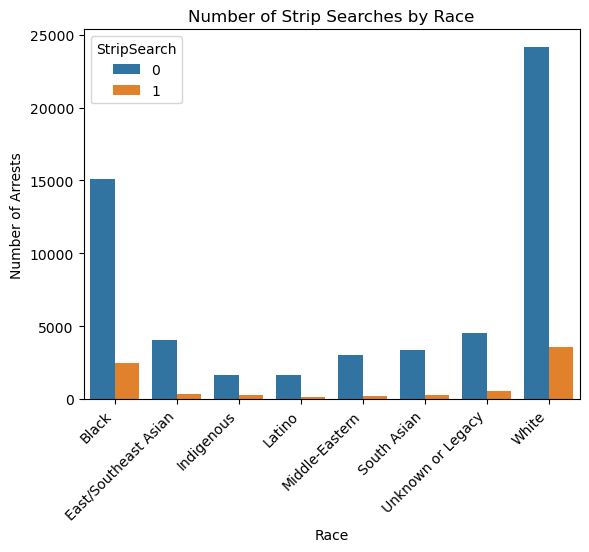

In [23]:
#This is the start of Research Question 1

#Bar graph 

counts = df.groupby(['Perceived_Race', 'StripSearch']).size().reset_index(name='counts')

ax = sns.barplot(x='Perceived_Race', y='counts', hue='StripSearch', data=counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

#Label and plot 
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.title('Number of Strip Searches by Race')
plt.show()


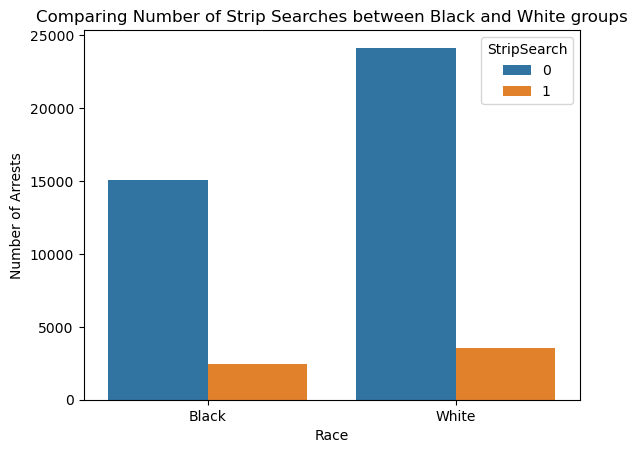

In [24]:
#Making sperate bar graph for Black and White groups 

df_bw = df.loc[df['Perceived_Race'].isin(['Black', 'White'])]

counts = df_bw.groupby(['Perceived_Race', 'StripSearch']).size().reset_index(name='counts')

sns.barplot(x='Perceived_Race', y='counts', hue='StripSearch', data=counts)

#Label and plot 
plt.xlabel('Race')
plt.ylabel('Number of Arrests')
plt.title('Comparing Number of Strip Searches between Black and White groups')
plt.show()

In [25]:
# Create separate dataframes for Black and White groups 

df_black = df_bw.loc[df_bw['Perceived_Race'] == 'Black']
df_white = df_bw.loc[df_bw['Perceived_Race'] == 'White']

# Run a t-test for independent samples
t, p = ttest_ind(df_black['StripSearch'], df_white['StripSearch'])

print(f't-value: {t}')
print(f'p-value: {p}')


t-value: 3.132027931633524
p-value: 0.001737139892022894


In [26]:
b_values = df_black['StripSearch'].value_counts()

print("Number of zeros:", b_values[0])
print("Number of ones:", b_values[1])

Number of zeros: 15092
Number of ones: 2434


In [27]:
w_values = df_white['StripSearch'].value_counts()
print("Number of zeros:", w_values[0])
print("Number of ones:", w_values[1])

Number of zeros: 24157
Number of ones: 3566


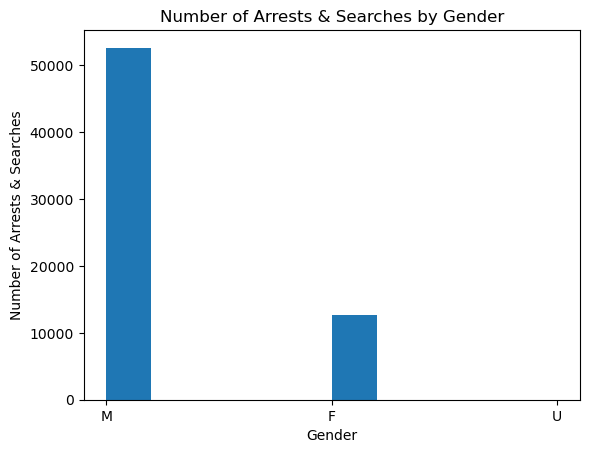

In [28]:
#Histogram
df['Sex'].hist()
plt.gca().set(title='Number of Arrests & Searches by Gender', ylabel='Number of Arrests & Searches', xlabel='Gender')
plt.grid(None)

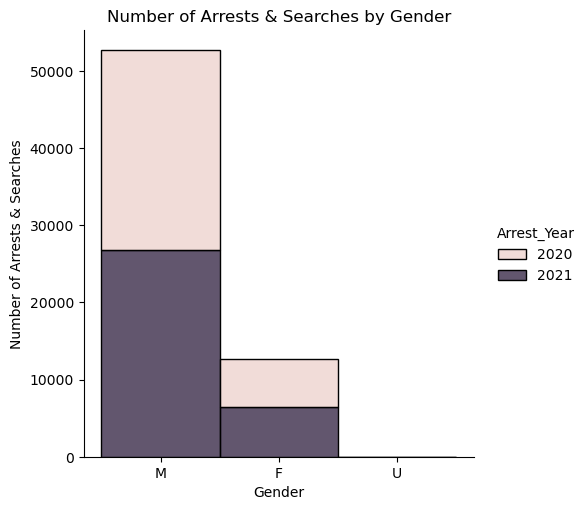

In [29]:
#histogram 

sns.displot(data=df, x='Sex', hue='Arrest_Year', multiple='stack')
plt.gca().set(title='Number of Arrests & Searches by Gender', ylabel='Number of Arrests & Searches', xlabel='Gender')
plt.grid(None)
plt.grid(None)
plt.show()



Text(0.5, 1.0, 'Number of Arrests for Females by Year')

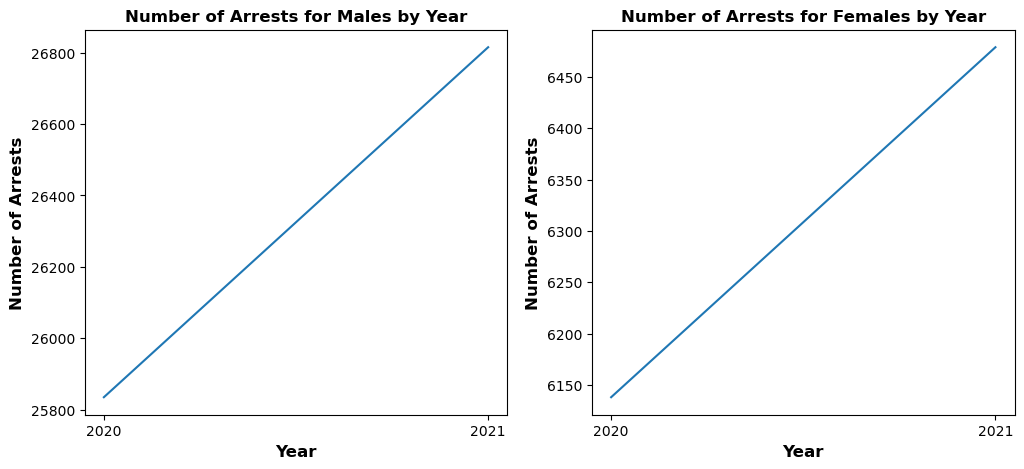

In [30]:
#Number of arrests by year:
grouped_data=df[["Arrest_Year","Sex"]].value_counts()
my_figure=plt.figure(figsize=(12,5))
plot1=my_figure.add_subplot(121)
plot1.plot(["2020","2021"],grouped_data.values[:2][::-1])
plot1.set_xlabel("Year",fontweight="bold",size=12)
plot1.set_ylabel("Number of Arrests",fontweight="bold",size=12)
plot1.set_title("Number of Arrests for Males by Year",fontweight="bold",size=12)
plot2=my_figure.add_subplot(122)
plot2.plot(["2020","2021"],grouped_data.values[2:4][::-1])
plot2.set_xlabel("Year",fontweight="bold",size=12)
plot2.set_ylabel("Number of Arrests",fontweight="bold",size=12)
plot2.set_title("Number of Arrests for Females by Year",fontweight="bold",size=12)

In [31]:
#The proportion of people resisting arrest by gender is:
df.groupby("Sex").mean()["Actions_at_arrest___Resisted__d"]

/tmp/ipykernel_475/3006662964.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Sex").mean()["Actions_at_arrest___Resisted__d"]


Sex
F    0.034319
M    0.039297
U    0.000000
Name: Actions_at_arrest___Resisted__d, dtype: float64

In [32]:
#The proportion of people resisting arrest by race is:
df.groupby("Perceived_Race").mean()["Actions_at_arrest___Resisted__d"]

/tmp/ipykernel_475/3508199499.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("Perceived_Race").mean()["Actions_at_arrest___Resisted__d"]


Perceived_Race
Black                   0.045418
East/Southeast Asian    0.026501
Indigenous              0.063082
Latino                  0.034502
Middle-Eastern          0.031820
South Asian             0.024910
Unknown or Legacy       0.027690
White                   0.038704
Name: Actions_at_arrest___Resisted__d, dtype: float64

In [33]:
#Conducting the t-test #Is there a significant difference in the Number of arrests between males and females who Resisted arrest?
data_male=df[df["Sex"]=="M"]
data_female=df[df["Sex"]=="F"]

stats.ttest_ind(data_male['Actions_at_arrest___Resisted__d'], data_female['Actions_at_arrest___Resisted__d'])



Ttest_indResult(statistic=2.6159752331837014, pvalue=0.008899349168217038)

In [34]:
#Conducting the t-test:  #Is there a significant difference in the Number of arrests between males and females due to "Mental Instability"?
data_male=df[df["Sex"]=="M"]
data_female=df[df["Sex"]=="F"]
stats.ttest_ind(data_male['Actions_at_arrest___Mental_inst'], data_female['Actions_at_arrest___Mental_inst'])

Ttest_indResult(statistic=-4.6462791265845125, pvalue=3.3863443348731133e-06)

In [35]:
#Conducting the t-test:  #Is there a significant difference in the Number of Assault Arrests between males and females?
data_male=df[df["Sex"]=="M"]
data_female=df[df["Sex"]=="F"]
stats.ttest_ind(data_male['Actions_at_arrest___Assaulted_o'], data_female['Actions_at_arrest___Assaulted_o'])


Ttest_indResult(statistic=-3.089680728166269, pvalue=0.0020045596502630183)

In [36]:
#Analyzing the effect of perceived race and sex on the rate of mental instability among the arrested people:
df.groupby(["Perceived_Race","Sex"]).mean()["Actions_at_arrest___Mental_inst"]


/tmp/ipykernel_475/2853432490.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Perceived_Race","Sex"]).mean()["Actions_at_arrest___Mental_inst"]


Perceived_Race        Sex
Black                 F      0.050797
                      M      0.035276
East/Southeast Asian  F      0.018792
                      M      0.025068
Indigenous            F      0.031797
                      M      0.044444
Latino                F      0.011364
                      M      0.025948
                      U      0.000000
Middle-Eastern        F      0.052198
                      M      0.031674
South Asian           F      0.031434
                      M      0.021263
Unknown or Legacy     F      0.025918
                      M      0.018900
                      U      0.333333
White                 F      0.041511
                      M      0.034152
                      U      0.200000
Name: Actions_at_arrest___Mental_inst, dtype: float64

In [37]:
#Performing two-way ANOVA:   #Are there significant differences by Gender and Race between those who were arrested for "Mental Instability or Possibly Suicidal"?
model = ols(
'Actions_at_arrest___Mental_inst ~ C(Perceived_Race) + C(Sex) +\
C(Perceived_Race):C(Sex)', data=df).fit()
sm.stats.anova_lm(model, typ=2)


/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/opt/conda/lib/python3.10/site-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Perceived_Race),1.123699,7.0,4.982941,0.001862
C(Sex),0.622937,2.0,9.668253,0.000063
C(Perceived_Race):C(Sex),1.435839,14.0,3.183547,0.000427
Residual,2102.165110,65253.0,NaN,NaN
